# Analýza dat Českého statistického úřadu ze sčítání lidu 2011

Tento příklad se zabývá ukázkou datové analýzy, kde zdrojovými daty jsou předzpracované výsledky ze sčítání lidu, domů a bytů 2011 poskytované ČSU.

## Import knihoven

Pro potřeby zpracování je nutné importovat knihovny:

- numpy : Knihovna pro vědecké výpočty
- pandas : Knihovna pro datovou analýzu
- seaborn : Knihovna pro statistickou vizualizaci dat

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# jupyter notebook "magic function", zkratka pro zobrazování matplotlib grafů
%matplotlib inline 

## Načtení dat

Data pro analýzu jsou uložena na internetovém serveru a jsou přístupná přes protokol http. Jsou uložena ve formátu 
Comma-Separetd Values (CSV) a v textovém souboru (TXT).

soubor obyvatelstvo.csv obsahuje samotná data pro analýzu, kde každý sloupec je označen kódem. Význam těchto kódů je uložen v souboru popis.txt.

Data lze načíst například pomocí funkce read_csv z knihovny Pandas, která data načte do paměti, zpracuje a vrátí ve formátu [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?target="_blank").

In [2]:
data = pd.read_csv('http://aspicc.fs.cvut.cz/static/obyvatelstvo.csv')
popis = pd.read_csv('http://aspicc.fs.cvut.cz/static/popis.txt')

Proměnná data nyní obsahuje předzpracovaná data pro analýzu a v proměnné popis význam kódů sloupců, obě proměnné jsou ve formátu [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?target="_blank"), pro jejich vypsání je možné použít funkci [`print()`](https://docs.python.org/3/library/functions.html?target=_blank#print), nebo v případě IPython lépe funkci [`display()`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?taget=_blank#module-IPython.display).

In [3]:
display(data.head())
display(popis.head())

,typuz_naz,nazev,uzcis,uzkod,vse1111,vse1112,vse1113,vse1121,vse1122,vse1123,...,vse6193,vse61101,vse61102,vse61103,vse61111,vse61112,vse61113,vse61121,vse61122,vse61123
0,kraj,Hlavní město Praha,100,3018,1268796.0,613738.0,655058.0,535604.0,285543.0,250061.0,...,294698.0,231135.0,83326.0,147809.0,147461.0,73622.0,73839.0,123182.0,72214.0,50968.0
1,kraj,Středočeský kraj,100,3026,1289211.0,637252.0,651959.0,507375.0,280621.0,226754.0,...,334656.0,266140.0,102500.0,163640.0,174154.0,87125.0,87029.0,66595.0,40072.0,26523.0
2,kraj,Jihočeský kraj,100,3034,628336.0,308296.0,320040.0,245650.0,135702.0,109948.0,...,169649.0,142858.0,55375.0,87483.0,90905.0,45122.0,45783.0,26619.0,15605.0,11014.0
3,kraj,Plzeňský kraj,100,3042,570401.0,282137.0,288264.0,222189.0,124170.0,98019.0,...,149000.0,130064.0,51112.0,78952.0,74891.0,37205.0,37686.0,31752.0,19261.0,12491.0
4,kraj,Karlovarský kraj,100,3051,295595.0,145483.0,150112.0,121610.0,67238.0,54372.0,...,74334.0,62774.0,23914.0,38860.0,38270.0,19367.0,18903.0,24405.0,13850.0,10555.0


,vse1111,Obyvatelstvo celkem
0,vse1112,Obyvatelstvo muži
1,vse1113,Obyvatelstvo ženy
2,vse1121,Obyvatelstvo - svobodní
3,vse1122,Obyvatelstvo - svobodní - muži
4,vse1123,Obyvatelstvo - svobodní - ženy


Řádky v promměné `data` jsou indexovány celými čísly od jedničky, jelikož při importu nebyl zadán název sloupce s indexy. V datech jsou smysluplné indexy dva: *typuz_nas* a *nazev*, tedy typ územní jednotky a její název. objektu typu `pd.DataFrame` je možné nastvit více indexů pomocí funkce [`set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html?target="_blank").

In [4]:
data = data.set_index(['typuz_naz', 'nazev'])
display(data.head())

uzcis  uzkod    vse1111   vse1112   vse1113  \
typuz_naz nazev                                                             
kraj      Hlavní město Praha    100   3018  1268796.0  613738.0  655058.0   
          Středočeský kraj      100   3026  1289211.0  637252.0  651959.0   
          Jihočeský kraj        100   3034   628336.0  308296.0  320040.0   
          Plzeňský kraj         100   3042   570401.0  282137.0  288264.0   
          Karlovarský kraj      100   3051   295595.0  145483.0  150112.0   

                               vse1121   vse1122   vse1123   vse1131  \
typuz_naz nazev                                                        
kraj      Hlavní město Praha  535604.0  285543.0  250061.0  494760.0   
          Středočeský kraj    507375.0  280621.0  226754.0  560242.0   
          Jihočeský kraj      245650.0  135702.0  109948.0  273128.0   
          Plzeňský kraj       222189.0  124170.0   98019.0  245661.0   
          Karlovarský kraj    121610.0   67238.0   54372.0  113269.0   

                               vse1132  ...   vse6193  vse61101  vse61102  \
typuz_naz nazev                         ...                                 
kraj      Hlavní město Praha  250059.0  ...  294698.0  231135.0   83326.0   
          Středočeský kraj    281672.0  ...  334656.0  266140.0  102500.0   
          Jihočeský kraj      136620.0  ...  169649.0  142858.0   55375.0   
          Plzeňský kraj       123377.0  ...  149000.0  130064.0   51112.0   
          Karlovarský kraj     56712.0  ...   74334.0   62774.0   23914.0   

                              vse61103  vse61111  vse61112  vse61113  \
typuz_naz nazev                                                        
kraj      Hlavní město Praha  147809.0  147461.0   73622.0   73839.0   
          Středočeský kraj    163640.0  174154.0   87125.0   87029.0   
          Jihočeský kraj       87483.0   90905.0   45122.0   45783.0   
          Plzeňský kraj        78952.0   74891.0   37205.0   37686.0   
          Karlovarský kraj     38860.0   38270.0   19367.0   18903.0   

                              vse61121  vse61122  vse61123  
typuz_naz nazev                                             
kraj      Hlavní město Praha  123182.0   72214.0   50968.0  
          Středočeský kraj     66595.0   40072.0   26523.0  
          Jihočeský kraj       26619.0   15605.0   11014.0  
          Plzeňský kraj        31752.0   19261.0   12491.0  
          Karlovarský kraj     24405.0   13850.0   10555.0  

[5 rows x 173 columns]

## Zpracování dat

Nyní můžeme využít indexu *typuz_naz* k vyfiltrování územních jednotek typu *obec* pomocí funkce [`loc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?target='_blank').

In [5]:
display(data.loc['obec'].head())

,uzcis,uzkod,vse1111,vse1112,vse1113,vse1121,vse1122,vse1123,vse1131,vse1132,...,vse6193,vse61101,vse61102,vse61103,vse61111,vse61112,vse61113,vse61121,vse61122,vse61123
nazev,,,,,,,,,,,,,,,,,,,,,
Želechovice nad Dřevnicí,43,500011,1911.0,947.0,964.0,696.0,390.0,306.0,935.0,467.0,...,514.0,473.0,185.0,288.0,285.0,145.0,140.0,62.0,34.0,28.0
Petrov nad Desnou,43,500020,1195.0,588.0,607.0,442.0,246.0,196.0,515.0,262.0,...,342.0,317.0,117.0,200.0,164.0,79.0,85.0,65.0,34.0,31.0
Libhošť,43,500046,1539.0,764.0,775.0,573.0,318.0,255.0,736.0,368.0,...,414.0,355.0,147.0,208.0,243.0,118.0,125.0,37.0,20.0,17.0
Veřovice,43,500259,1953.0,952.0,1001.0,798.0,428.0,370.0,873.0,436.0,...,576.0,450.0,175.0,275.0,347.0,154.0,193.0,47.0,31.0,16.0
Vřesina,43,500291,2693.0,1311.0,1382.0,939.0,509.0,430.0,1400.0,691.0,...,758.0,638.0,256.0,382.0,439.0,214.0,225.0,76.0,33.0,43.0


Pokud chceme pracovat jen z daty týkajících se obcí, pak můžeme výstup z příkazu `data.loc['obec']` uložit do nové proměnné. 
Jestliže plánujeme tyto data pak dále měnít, je vhodné použít funkci [`copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html?target='_blank') která vytvoří kopii vybraných dat, jinak
nová proměnná bude jen ukazovat do původních dat a změny se tak promítnou i v proměnné `data`.

In [6]:
obce = data.loc['obec'].copy()

Nyní můžeme jednoduše například spočítat počet všech obyvatel žijících v obcích v České republice v roce 2011.
K tomu lze využít funkci [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?target='_blank'), 
která vrací součet po dané ose. Počet obyvatel je ve sloupci s kódem *vse1111*.

In [7]:
display(obce['vse1111'].sum())

10436560.0

Pokud si chceme rozdělit obce dle velikosti, pak čistě číslo počtu obyvatel nestačí. Pomocí funkce [`cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?target='blank') můžeme data rozdělit do košů
dle daných mezí. Nejprve si nadefinujeme názvy jednotlivých velikostí, tedy jednotlivých košů.

In [8]:
velikosti = ['0-1999', '2000-4999', '5000-9999', 
             '10000-49999', '50000 a vic']

Pak pomocí funkce [`cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?target='blank') 
provedeme rozdělení do košů. První parametr je sloupec vstupních dat, druhý parametr jsou hranice jednotlivých košů, kde poslední hranice je nastavena tak, aby do posledního koše padla i největší obec (Praha). 
Parametr `label` definuje názvy košů. Výsledek je přiřazen zpět do proměnné obec pomocí funkce [`loc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?target='_blank'), kde `:` je zástupný
znak pro všechny řádky a `'velikost'` je název sloupce. Jelikož tento slouec v proměnné `obce` neexistuje, bude vytvořen.

In [9]:
obce.loc[:, 'velikost'] = pd.cut(obce.vse1111, 
                          [0, 1999, 4999, 9999, 49999, 10000000], 
                          labels=velikosti)

Pro kontrolu si můžeme vypsat sloupec `'velikost'` v proměnné `obce`.

In [10]:
display(obce['velikost'])

nazev
Želechovice nad Dřevnicí       0-1999
Petrov nad Desnou              0-1999
Libhošť                        0-1999
Veřovice                       0-1999
Vřesina                     2000-4999
                              ...    
Suchdol nad Odrou           2000-4999
Štramberk                   2000-4999
Tichá                          0-1999
Tísek                          0-1999
Trojanovice                 2000-4999
Name: velikost, Length: 6251, dtype: category
Categories (5, object): [0-1999 < 2000-4999 < 5000-9999 < 10000-49999 < 50000 a vic]

Nyní si můžeme například vypsat počet obyvatel v obcích se stejnou velikostí. K tomu využijem funkci [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?target='blank'), která
seksupí data dle daného sloupce. Na takto seksupených datech je pak použita funkce [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?target='_blank').

In [11]:
obce.groupby('velikost')['vse1111'].sum()

velikost
0-1999         2786110.0
2000-4999      1228315.0
5000-9999       933230.0
10000-49999    2285110.0
50000 a vic    3203795.0
Name: vse1111, dtype: float64

Pokud nás zajímá procentuální rozložení obyvatelstva dle velikosti obce, stačí výsledek vidělit celkovým počtem obyvatel.

In [12]:
obce.groupby('velikost')['vse1111'].sum()/obce['vse1111'].sum()

velikost
0-1999         0.266957
2000-4999      0.117693
5000-9999      0.089419
10000-49999    0.218952
50000 a vic    0.306978
Name: vse1111, dtype: float64

Výsledek je ve formě desetiných čísel se součtem 1. Pro převod na procenta výsledek uložíme do nové proměnné `rozlozeni`, přejmenujeme jí změnou atributu `name` a na ní pak aplikujeme funkci agregační funkci [`agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html?target='_blank'), která aplikuje na každou buňku dat funkci, která je předána jako parametr.
Tu definujeme jako lambda funkci s jedním vstupem `x` a návratovou hodnotou ve formě formátovaného řetězce.

In [13]:
rozlozeni = obce.groupby('velikost')['vse1111'].sum()/obce['vse1111'].sum()
rozlozeni.name = 'Rozložení počtu obyvatel dle velikostí obcí'
display(rozlozeni.agg(lambda x: '{0:.2f}%'.format(x*100)))

velikost
0-1999         26.70%
2000-4999      11.77%
5000-9999       8.94%
10000-49999    21.90%
50000 a vic    30.70%
Name: Rozložení počtu obyvatel dle velikostí obcí, dtype: object

Stejným způsobem se můžeme podívat například na rozložení přihlášení se občanů k Římskokatolické 
církvi (sloupec `'vse5141'`) dle velikosti obce. 

In [14]:
data_rk = obce.groupby('velikost')['vse5141'].sum()/obce.groupby('velikost')['vse1111'].sum()

In [15]:
data_rk.agg(lambda x: '{0:.2f}%'.format(x*100))

velikost
0-1999         13.82%
2000-4999      12.70%
5000-9999      10.81%
10000-49999     8.41%
50000 a vic     7.76%
dtype: object

Pomocí funkce [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?target='_blank') zobrazíme základní statistické shrnutí dat.

In [16]:
obce.groupby('velikost')['vse5141'].describe()

,count,mean,std,min,25%,50%,75%,max
velikost,,,,,,,,
0-1999,5584.0,68.942514,95.813908,0.0,14.0,35.0,83.00,1079.0
2000-4999,402.0,387.947761,357.266143,19.0,133.0,287.5,488.75,2351.0
5000-9999,135.0,747.185185,506.347341,155.0,344.0,654.0,1020.00,2563.0
10000-49999,112.0,1715.098214,1287.879638,298.0,740.0,1287.0,2317.50,6054.0
50000 a vic,18.0,13809.555556,19840.058981,1564.0,5194.5,6462.5,10919.50,80158.0


Zde vidíme, že ve skupině nejmenších obcí o velikosti do 1999 obyvatel jsou obce, ve kterých se k Římskokatolické církvi nepřihlásil během sčítání nikdo. Pokud by nás zajímalo, které obce to jsou, pak je možné využít indexování pomocí binárního vektoru. Porovnáním `obce.vse5141 == 0` získáme binární vektor o stejné délce, jako počet řádek
v `DataFrame` `obce`. Tento vektor pak lze využít k vyfiltrování řádků zplňujících podmínku jednodychým využitím
získaného vektoru jako binárního indexu.

In [17]:
obce[obce.vse5141 == 0]['vse5141']

nazev
Čichalov         0.0
Skalka u Doks    0.0
Ždírec           0.0
Hněvnice         0.0
Čerňovice        0.0
Kařízek          0.0
Janská           0.0
Blšany u Loun    0.0
Kozly            0.0
Staňkovice       0.0
Dílce            0.0
Velenice         0.0
Všestudy         0.0
Chotiněves       0.0
Všesulov         0.0
Karlova Ves      0.0
Václavy          0.0
Siřejovice       0.0
Čečovice         0.0
Hvožďany         0.0
Slatina          0.0
Habrovany        0.0
Nemyslovice      0.0
Pravy            0.0
Holenice         0.0
Vísky            0.0
Březina          0.0
Přerubenice      0.0
Stradonice       0.0
Name: vse5141, dtype: float64

Pro další analýzu bude potřeba rozdělit obce dle procentuálního podílu obyvatel hlásících se k Římskokatolické církvi.  Nejdříve vytvoříme nový sloupec který bude obsahovat zmíněný procentuální podíl:  

In [18]:
obce['rims_katol'] = obce['vse5141']/obce['vse1111']*100

Pak nadefinumejeme `list()` obsahující názvy kategorií do kterých budeme obce dělit:  

In [19]:
procenta = ['do 10%', '10-30%', '31-50%', '51-75%', '75-100%']

A nakonec opět využijeme funkci [`cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?target='blank')

In [20]:
obce['rims_katol_cat']=pd.cut(obce.rims_katol, [0,10,30,50,75,100],
                             right=False, labels=procenta)

Nyní můžeme vytvořit kontingenční tabulku, která zobrazí počet obcí spadajících do dvou skupin kategorií (velikost a procentuální podíl Římských katolíků). K tomu lze použít funkci [`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

In [21]:
pd.crosstab(obce.velikost, obce.rims_katol_cat)

rims_katol_cat,do 10%,10-30%,31-50%,51-75%,75-100%
velikost,,,,,
0-1999,2672,2252,568,91,1
2000-4999,213,155,26,8,0
5000-9999,75,54,6,0,0
10000-49999,74,37,1,0,0
50000 a vic,11,7,0,0,0


Nakonec si pomocí knihovny `seaborn` vykreslíme krabicový graf, který zobrazí statistické rozložení procentuálního zastoupení římských katolíků dle velikostí obcí. Graf vykreslíme funkcí [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?target='_blank'), kde parametry `x` a `y` jsou názvy sloubců v `data=obce`. 

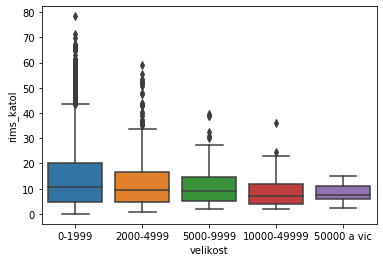

In [22]:
sns.boxplot(x='velikost', y='rims_katol', data=obce);